<p><b> Reading the dataset from the File Path </b></p>

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

print("imported necessary modules")

imported necessary modules


<p><b>Glace at the DataSet</b></p>

In [2]:
df=pd.read_csv('sales_data_sample.csv',index_col='ORDERNUMBER',encoding='Latin-1')
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
ORDERNUMBER,,,,,,,,,,,,,,,,,,,,,
10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,North America,Yu,Kwai,Small
10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,North America,Young,Julie,Medium
10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,North America,Brown,Julie,Medium


<p><b>Create a sql connection to connect to the data base</b></p>

In [3]:
# Creating a SQLite connection and writing the dataframe to a table
import sqlite3
conn = sqlite3.connect('sales_data.db')
df.to_sql('sales', conn, if_exists='replace', index=False)
print("Changed the dataframe to the sales table")

Changed the dataframe to the sales table


In [4]:
# Define your SQL query
QUERY = """
SELECT YEAR_ID,
       SUM(CASE WHEN STATUS = 'Cancelled' THEN SALES ELSE 0 END) AS Cancelled_sales,
       SUM(CASE WHEN STATUS = 'Disputed' THEN SALES ELSE 0 END) AS Disputed_sales,
       SUM(CASE WHEN STATUS = 'In Process' THEN SALES ELSE 0 END) AS Inprocess_sales,
       SUM(CASE WHEN STATUS = 'On Hold' THEN SALES ELSE 0 END) AS Onhold_sales,
       SUM(CASE WHEN STATUS = 'Shipped' THEN SALES ELSE 0 END) AS Shipped_sales,
       SUM(CASE WHEN STATUS = 'Resolved' THEN SALES ELSE 0 END) AS Resolved_sales
FROM sales
GROUP BY YEAR_ID
ORDER BY YEAR_ID;
"""

# Execute the query and load the result into a DataFrameQUANTITYORDERED
df = pd.read_sql_query(QUERY, conn)

df.head()

,YEAR_ID,Cancelled_sales,Disputed_sales,Inprocess_sales,Onhold_sales,Shipped_sales,Resolved_sales
0,2003,48710.92,0.00,0.00,0.00,3439718.03,28550.59
1,2004,145776.56,0.00,0.00,26260.21,4528047.22,24078.61
2,2005,0.00,72212.86,144729.96,152718.98,1323735.83,98089.08


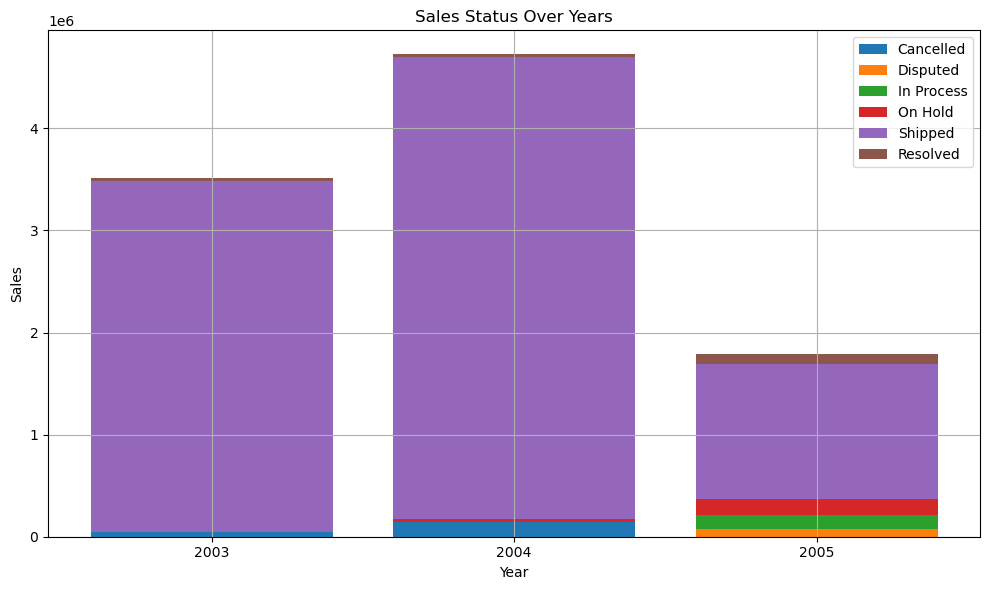

In [5]:
# Plotting the data
from matplotlib.ticker import MaxNLocator  # Import MaxNLocator
# Convert YEAR_ID to integer
df['YEAR_ID'] = df['YEAR_ID'].astype(int)
plt.figure(figsize=(10, 6))
plt.bar(df['YEAR_ID'], df['Cancelled_sales'], label='Cancelled')
plt.bar(df['YEAR_ID'], df['Disputed_sales'], bottom=df['Cancelled_sales'], label='Disputed')
plt.bar(df['YEAR_ID'], df['Inprocess_sales'], bottom=df['Cancelled_sales'] + df['Disputed_sales'], label='In Process')
plt.bar(df['YEAR_ID'], df['Onhold_sales'], bottom=df['Cancelled_sales'] + df['Disputed_sales'] + df['Inprocess_sales'], label='On Hold')
plt.bar(df['YEAR_ID'], df['Shipped_sales'], bottom=df['Cancelled_sales'] + df['Disputed_sales'] + df['Inprocess_sales'] + df['Onhold_sales'], label='Shipped')
plt.bar(df['YEAR_ID'], df['Resolved_sales'], bottom=df['Cancelled_sales'] + df['Disputed_sales'] + df['Inprocess_sales'] + df['Onhold_sales'] + df['Shipped_sales'], label='Resolved')

plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Sales Status Over Years')
plt.legend()
plt.grid(True)
# Set integer ticks on x-axis
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.tight_layout()

# Show plot
plt.show()

In [6]:
conn.close()